In [ ]:
%pip install numpy pandas matplotlib scikit-learn plotly

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px

%matplotlib inline

## K-Means on a synthetic data set

In [ ]:
# Setting random seed with a value of 0
np.random.seed(0)

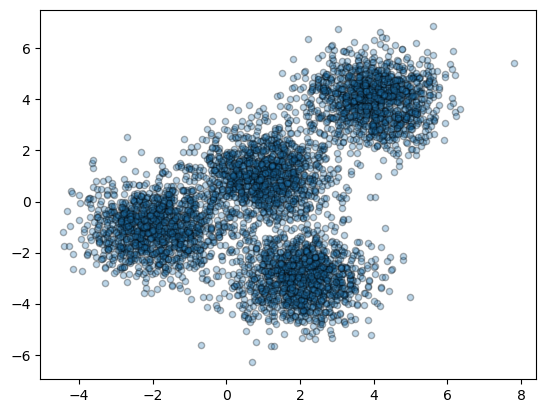

In [8]:
# Random clusters of points by using make_blobs class
## n_samples: Total number of points equally divided among clusters
## centres: Number of centres to generate, or the fixed centre locations (4 centre locations)
## cluster_std: the standard deviation of the clusters
centre_locations = [[4,4], [-2,-1], [2,-3], [1,1]]
X,y = make_blobs(n_samples=5000, centers=centre_locations, cluster_std=0.9)
# Display in a scatter plot
plt.scatter(X[:,0], X[:,1], marker=".", alpha=0.3, ec="k", s=80)

In [ ]:
# Initialize KMeans
## init: algorithm to choose the centroids
## n_init: Number of times the k-means algorithm is run with different centroid seeds
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)
# Fit the KMeans model
k_means.fit(X)
# Get label of each point in the model
k_means_labels = k_means.labels_
k_means_labels


array([1, 2, 2, ..., 1, 2, 1])

In [10]:
# Get coordinates of cluster centers
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-1.95435189, -1.03838397],
       [ 1.01322822,  1.03189906],
       [ 2.00565283, -3.01004347],
       [ 3.99581304,  3.99378477]])

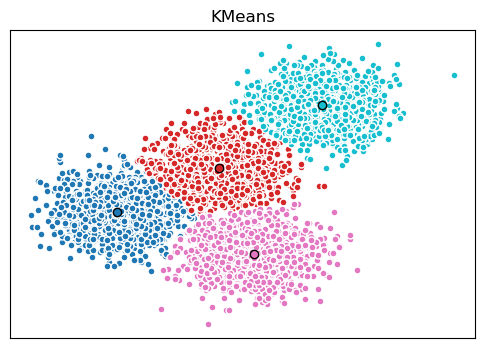

In [16]:
# Visualize
fig = plt.figure(figsize=(6,4))

# Use a color map, which will produce an array of colors based on the number of labels
# We use a set to get the unique labels
colors = plt.cm.tab10( np.linspace(0, 1, len(set(k_means_labels))) )

# Create plot
ax = fig.add_subplot(1,1,1)

# Plot the data points and centroids
# K will range from 0-3
for k,col in zip(range(len(centre_locations)), colors):
    # Create a list of all data point, where the data points that are in the cluster
    # are labeled as true
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center
    cluster_center = k_means_cluster_centers[k]

    # Plots the data points with color col
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".", ms=10)
    # Plot the centroids
    ax.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col, markeredgecolor="k", markersize=6)

# Title the plot
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.show()


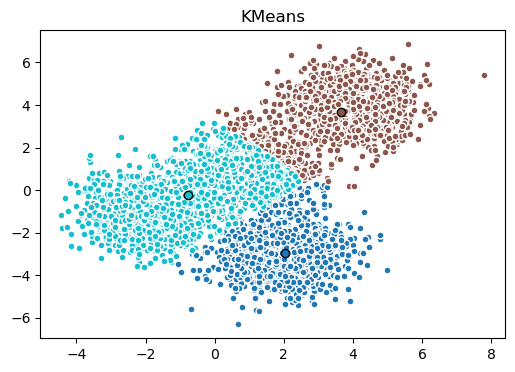

In [ ]:
# Clustering with a k of 3
k_means3 = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means3.fit(X)
# Visualize
fig = plt.figure(figsize=(6,4))
colors = plt.cm.tab10( np.linspace(0, 1, len(set(k_means3.labels_))) )
ax = fig.add_subplot(1,1,1)
for k,col in zip(range(len(centre_locations)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".", ms=10)
    ax.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col, markeredgecolor="k", markersize=6)

ax.set_title("KMeans")
plt.show()

# Under fitting

For k=3, the value of within-cluster sum of squares will be higher that for k=4, since the points from different natural clusters are being grouped together, leading to under fitting of the k-means model

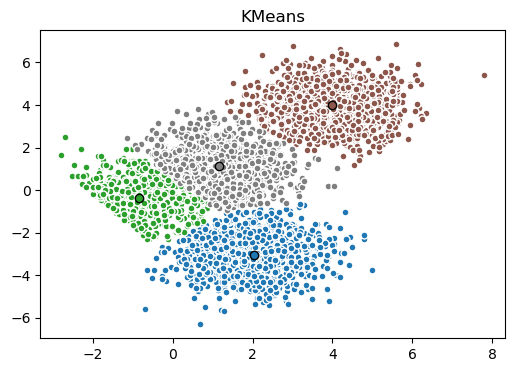

In [ ]:
# Clustering with a k of 3
k_means5 = KMeans(init="k-means++", n_clusters=5, n_init=12)
k_means5.fit(X)
# Visualize
fig = plt.figure(figsize=(6,4))
colors = plt.cm.tab10( np.linspace(0, 1, len(set(k_means5.labels_))) )
ax = fig.add_subplot(1,1,1)
for k,col in zip(range(len(centre_locations)), colors):
    my_members = (k_means5.labels_ == k)
    cluster_center = k_means5.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".", ms=10)
    ax.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col, markeredgecolor="k", markersize=6)

ax.set_title("KMeans")
plt.show()

# Overfitting

For k = 5, the value of sum of squares will be lesser that for k=4, since the points are distributed into more clusters than needed, leading to over fitting of the k-means model

# Customer Segmentation with K-means

In [19]:
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df.sample(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
166,167,31,3,6,54,0.402,1.110,0.0,NBA008,2.8
201,202,38,2,0,21,0.612,0.354,NaN,NBA018,4.6
394,395,25,1,5,22,0.403,1.995,0.0,NBA005,10.9
51,52,36,1,11,33,1.266,9.459,0.0,NBA002,32.5
279,280,26,2,4,28,0.226,2.434,0.0,NBA003,9.5


In [20]:
cust_df = cust_df.drop("Address", axis=1) # remove not used features
cust_df = cust_df.dropna() # drop NaNs from the dataframe
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [27]:
# Normalizing
X = cust_df.values[:,1:] # Leaves out CustomerId
clus_dataSet = StandardScaler().fit_transform(X)

In [28]:
# Modeling
cluster_number = 3
k_means = KMeans(init="k-means++", n_clusters=cluster_number, n_init=12)
k_means.fit(clus_dataSet)
labels = k_means.labels_

c:\Users\melod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



In [31]:
# Assign the KMeans cluster label into the dataframe
cust_df["Clus_km"] = labels

In [33]:
cust_df.groupby("Clus_km").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,398.782353,41.782353,1.970588,15.664706,91.935294,3.397894,6.349594,0.194118,11.439412
1,430.026316,31.315789,1.789474,3.611842,28.546053,1.431191,2.488355,0.986842,13.804605
2,444.883598,33.171958,1.584656,7.037037,31.621693,0.773315,1.807079,0.000000,8.305291


In [38]:
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [41]:
X

array([[41. ,  2. ,  6. , ...,  0. ,  6.3,  0. ],
       [47. ,  1. , 26. , ...,  0. , 12.8,  2. ],
       [33. ,  2. , 10. , ...,  1. , 20.9,  2. ],
       ...,
       [25. ,  4. ,  0. , ...,  1. , 33.4,  0. ],
       [32. ,  1. , 12. , ...,  0. ,  2.9,  0. ],
       [52. ,  1. , 16. , ...,  0. ,  8.6,  2. ]])

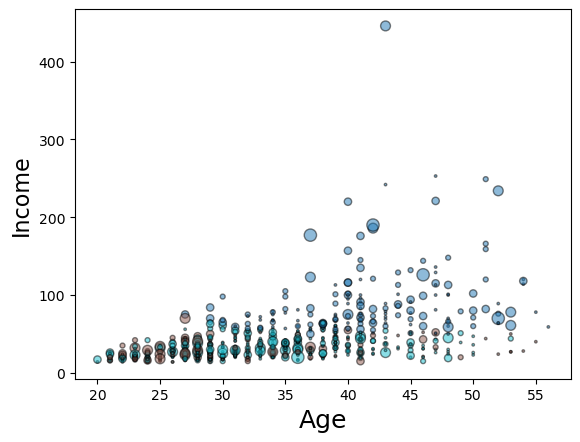

In [40]:
# Visualize this as a 2D Scatter plot
area = np.pi * (X[:, 1])**2

plt.scatter(X[:,0], X[:, 3], s=area, c=labels.astype(float), cmap="tab10", ec="k", alpha=0.5)
plt.xlabel("Age", fontsize=18)
plt.ylabel("Income", fontsize=16)
plt.show()


In [42]:
# Interactive 3D Scatter plot
fig = px.scatter_3d(X, x=1, y=0, z=3, opacity=0.7, color=labels.astype(float))

fig.update_traces(marker=dict(size=5, line=dict(width=.25)), showlegend = False)
fig.update_layout( coloraxis_showscale=False, width=1000, height=800, scene=dict(
    xaxis=dict(title="Education"),
    yaxis=dict(title="Age"),
    zaxis=dict(title="Income")
)) # Remove color bar, resize plot

fig.show()

The 3 clusters can be:
- LATE CAREER, AFFLUENT AND EDUCATED
- MID CAREER AND MIDDLE INCOME
- EARLY CAREER AND LOW INCOME